In [875]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [876]:
# read the data
df = pd.read_csv('../../Data Analytics/datasets/Bank Customer Churn/bank_customer_churn.csv')

In [877]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Understanding Data

In [878]:
df.shape

(10000, 18)

In [879]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

Change the name of some columns to maintain similarity

In [880]:
df.rename(columns={'Satisfaction Score': 'SatisfactionScore',
                   'Card Type': 'CardType',
                   'Point Earned': 'PointsEarned'}, inplace=True)

## Data Consistency and Validation

Check binary categorical fields has only 0s and 1s

In [881]:
binary_category_cols = ['HasCrCard', 'IsActiveMember', 'Exited', 'Complain']
for col in binary_category_cols:
    print(df[col].unique())

[1 0]
[1 0]
[1 0]
[1 0]


Check if the required features has only the values that belong to its data type

In [882]:
from collections import defaultdict

invalid_columns = defaultdict(list)
for col in df.columns:
    dtype = df[col].dtype
    if dtype == np.dtype('O'):
        dtype = str
    for value in df[col].unique():
        if not type(value) == dtype: 
            invalid_columns[col].append(value)

invalid_columns

defaultdict(list, {})

Check for duplicate rows 

In [883]:
df.duplicated().sum()

0

Check for outliers

In [884]:
from scipy.stats import zscore

z_scores = zscore(df.select_dtypes(include='number'))
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)
df[outliers]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointsEarned


Check if data is imbalanced

In [885]:
len(df[df['Exited'] == 0])

7962

Get Balanced Data Sample

In [886]:
df_not_exit = df[df['Exited'] == 0]
df_not_exit = df_not_exit.sample(frac=0.3, random_state=42)

In [887]:
len(df_not_exit)

2389

In [888]:
df_exit = df[df['Exited'] == 1]
len(df_exit)

2038

In [889]:
df = pd.concat([df_not_exit, df_exit])
len(df)

4427

## Format the Data for Modeling

Split data into features and label

In [890]:
X, y = df.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1), df['Exited']

In [891]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,SatisfactionScore,CardType,PointsEarned
2175,757,Germany,Female,34,9,101861.36,2,0,0,187011.96,0,5,PLATINUM,903
1979,644,France,Male,33,8,0.00,2,1,1,155294.17,0,5,SILVER,813
1932,655,Spain,Female,56,5,0.00,2,1,1,41782.70,0,2,PLATINUM,979
1518,710,Spain,Female,36,8,0.00,2,0,0,83206.19,0,3,SILVER,636
4455,684,Spain,Female,31,8,0.00,2,1,0,188637.05,0,4,SILVER,515


In [892]:
y.head()

2175    0
1979    0
1932    0
1518    0
4455    0
Name: Exited, dtype: int64

### One-hot encode categorical variables

In [893]:
X_encoded = pd.get_dummies(X, columns=['Geography', 'Gender', 'CardType'])

In [894]:
X_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,SatisfactionScore,PointsEarned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CardType_DIAMOND,CardType_GOLD,CardType_PLATINUM,CardType_SILVER
2175,757,34,9,101861.36,2,0,0,187011.96,0,5,903,False,True,False,True,False,False,False,True,False
1979,644,33,8,0.00,2,1,1,155294.17,0,5,813,True,False,False,False,True,False,False,False,True
1932,655,56,5,0.00,2,1,1,41782.70,0,2,979,False,False,True,True,False,False,False,True,False
1518,710,36,8,0.00,2,0,0,83206.19,0,3,636,False,False,True,True,False,False,False,False,True
4455,684,31,8,0.00,2,1,0,188637.05,0,4,515,False,False,True,True,False,False,False,False,True


In [895]:
X_encoded.shape

(4427, 20)

In [896]:
sum(y)/len(y)

0.46035690083578046

## Building Models

### 1. Preliminary Random Forest Classifier

Split the data into training and test

In [897]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [898]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(criterion='gini',
                                max_depth=8,
                                min_samples_split=10,
                                max_features=0.8,
                                random_state=42)

In [899]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=0.8, min_samples_split=10,
                       random_state=42)

In [900]:
# make prediction
y_pred_rf = clf_rf.predict(X_test)

Evaluate the model with accuracy score

In [901]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_rf)

0.9984951091045899

Draw the confusion matrix

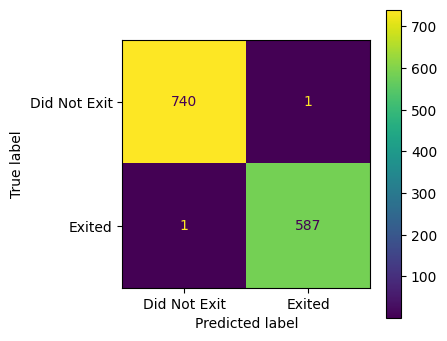

In [902]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf)
fig, ax = plt.subplots(figsize=(4, 4))
cm_plot = ConfusionMatrixDisplay(cm, display_labels=['Did Not Exit', 'Exited'])
cm_plot.plot(ax=ax)
plt.show()

Of the **398 + 1 = 399** people that left the company, **398 (99.74%)** were classified correctly, which is very accurate as per our needs. However, this may result in overfitting. 

### 2. Preliminary XgBoost Classifier

Split the data into training and test

In [903]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=69)

In [904]:
from xgboost import XGBClassifier 

xgb_clf = XGBClassifier(objective='binary:logistic',
                        early_stopping_rounds=10,
                        eval_metric='logloss', 
                        seed=42)

In [905]:
xgb_clf.fit(X_train, 
            y_train,
            verbose=True,
            eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.43631
[1]	validation_0-logloss:0.29758
[2]	validation_0-logloss:0.21024
[3]	validation_0-logloss:0.15190
[4]	validation_0-logloss:0.11163
[5]	validation_0-logloss:0.08335
[6]	validation_0-logloss:0.06329
[7]	validation_0-logloss:0.04892
[8]	validation_0-logloss:0.03861
[9]	validation_0-logloss:0.03118
[10]	validation_0-logloss:0.02560
[11]	validation_0-logloss:0.02167
[12]	validation_0-logloss:0.01884
[13]	validation_0-logloss:0.01674
[14]	validation_0-logloss:0.01528
[15]	validation_0-logloss:0.01420
[16]	validation_0-logloss:0.01347
[17]	validation_0-logloss:0.01306
[18]	validation_0-logloss:0.01280
[19]	validation_0-logloss:0.01267
[20]	validation_0-logloss:0.01236
[21]	validation_0-logloss:0.01242
[22]	validation_0-logloss:0.01234
[23]	validation_0-logloss:0.01243
[24]	validation_0-logloss:0.01256
[25]	validation_0-logloss:0.01266
[26]	validation_0-logloss:0.01250
[27]	validation_0-logloss:0.01262
[28]	validation_0-logloss:0.01264
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [906]:
# make prediction
y_pred_xgb = xgb_clf.predict(X_test)

Evaluate the model with accuracy score

In [907]:
accuracy_score(y_test, y_pred_xgb)

0.9984951091045899

Draw the confusion matrix

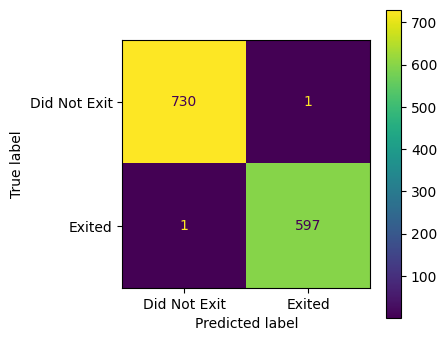

In [908]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_xgb)
fig, ax = plt.subplots(figsize=(4, 4))
cm_plot = ConfusionMatrixDisplay(cm, display_labels=['Did Not Exit', 'Exited'])
cm_plot.plot(ax=ax)
plt.show()

Of the **398 + 1 = 399** people that left the company, **398 (99.74%)** were classified correctly, which is very accurate as per our needs. However, this may result in overfitting. 

### 3. Neural Network

Split the data into training and test

In [909]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=0)

In [910]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F

# scale some features
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'SatisfactionScore', 'PointsEarned']
for f in features:
    X_train[f] = (X_train[f]-X_train[f].min()) / (X_train[f].max()-X_train[f].min())
    X_test[f] = (X_test[f]-X_test[f].min()) / (X_test[f].max()-X_test[f].min())

In [911]:
# convert boolean column to int
X_train = X_train.apply(lambda x: x.astype(int) if x.dtype == bool else x)
X_test = X_test.apply(lambda x: x.astype(int) if x.dtype == bool else x)

In [912]:
# check the converted features
X_train.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,SatisfactionScore,PointsEarned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CardType_DIAMOND,CardType_GOLD,CardType_PLATINUM,CardType_SILVER
8455,0.518,0.530303,0.6,0.000000,0.333333,1,1,0.621012,0,0.50,0.575866,1,0,0,1,0,0,1,0,0
493,0.362,0.439394,0.6,0.000000,0.000000,0,0,0.975123,1,0.25,0.414576,1,0,0,1,0,0,0,0,1
4020,0.742,0.363636,0.4,0.431804,0.000000,0,0,0.005492,0,0.25,0.750299,1,0,0,0,1,1,0,0,0


In [913]:
X_test.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,SatisfactionScore,PointsEarned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CardType_DIAMOND,CardType_GOLD,CardType_PLATINUM,CardType_SILVER
4473,0.592,0.177419,0.4,0.422313,0.000000,1,0,0.077375,0,0.00,0.256527,0,1,0,1,0,0,0,1,0
3407,0.564,0.354839,0.3,0.770651,0.333333,1,0,0.746644,0,0.75,0.389330,1,0,0,0,1,0,1,0,0
5033,0.372,0.693548,0.8,0.259828,0.000000,1,1,0.321812,1,0.25,0.307605,1,0,0,1,0,1,0,0,0


Convert data to PyTorch tensors

In [914]:
X_train_tensor = torch.Tensor(X_train.values)
y_train_tensor = torch.Tensor(y_train.values).view(-1, 1)
X_test_tensor = torch.Tensor(X_test.values)
y_test_tensor = torch.Tensor(y_test.values).view(-1, 1)

Check the converted data

In [915]:
X_train_tensor[0]

tensor([0.5180, 0.5303, 0.6000, 0.0000, 0.3333, 1.0000, 1.0000, 0.6210, 0.0000,
        0.5000, 0.5759, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000,
        0.0000, 0.0000])

In [916]:
y_train_tensor[0]

tensor([0.])

In [917]:
# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 10)
        self.fc2 = nn.Linear(10, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return torch.sigmoid(x)

# Instantiate the model
input_dim = X_train.shape[1]
model = SimpleNN(input_dim=input_dim, output_dim=1)

# Define loss function and optimizer
criterion = F.binary_cross_entropy  # Use Cross Entropy Loss for binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Create DataLoader for training
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [918]:
# Training loop
n_total_steps = len(train_loader)
n_epochs = 50
for epoch in range(n_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f"epoch: {epoch+1}/{n_epochs}, step: {i+1}/{n_total_steps}, loss: {loss.item():.3f}")

epoch: 10/50, step: 97/97, loss: 0.003
epoch: 20/50, step: 97/97, loss: 0.001
epoch: 30/50, step: 97/97, loss: 0.001
epoch: 40/50, step: 97/97, loss: 0.001
epoch: 50/50, step: 97/97, loss: 0.001


In [919]:
# Create DataLoader for testing
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# Test the model: we don't need to compute gradients
with torch.no_grad():
    n_correct = 0
    n_samples = len(test_loader.dataset)

    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()
        n_correct += (predicted == labels).sum().item()

    acc = n_correct / n_samples
    print(f'Accuracy of the network on the {n_samples} test samples: {100*acc:.3f} %')

Accuracy of the network on the 1329 test samples: 99.925 %
